# [Machine Learning] : on text


Through this paper we intend to demonstrate how Machine Learning algorithms can be applied on text data, which has a widespread application in:

1. Data extraction and collection from financial documents

2. Data annotation, labeling, entity disambiguation and data enrichment

3. Using the data in Machine Learning and AI paradigms such as text classification, entity reconginition and information retrieval 

# Background: 


We have used 'Academic Research access' on the Twitter Developer Platform to extract bulk tweets. The details for requesting 'Academic Research access’ is available here:

https://developer.twitter.com/en/products/twitter-api/academic-research

The following Project & App was created. Subsequently, the Authentication Tokens were generated:




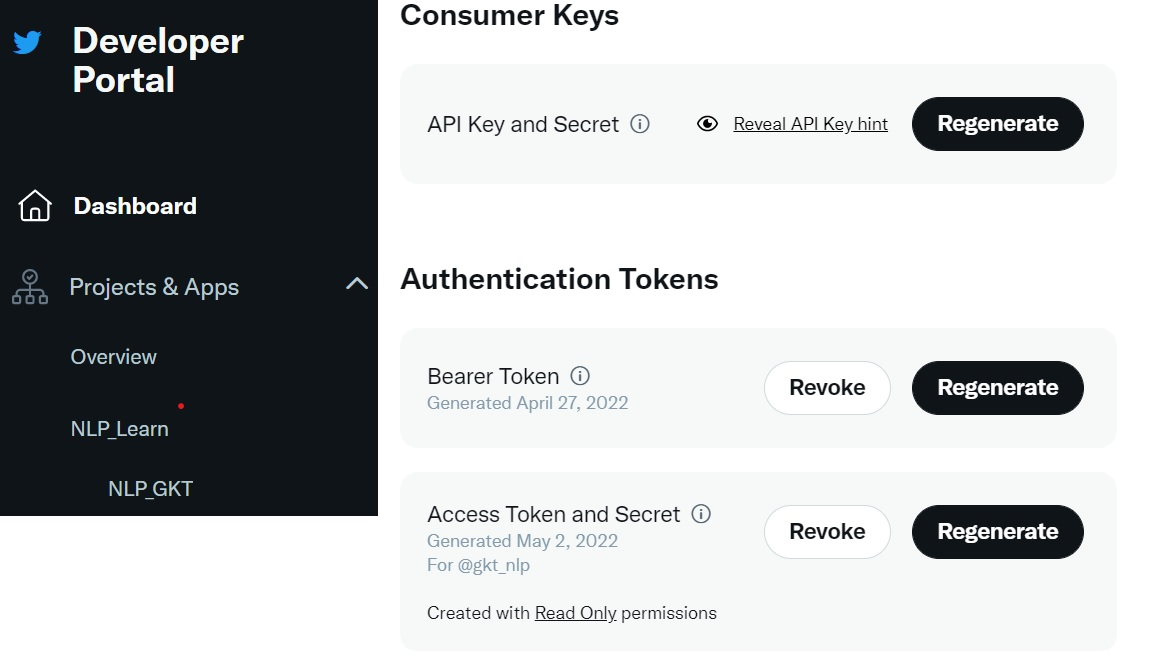

Using the 'Academic Research access' on the Twitter Developer Platform, approximately 5000 tweets were extracted for the following hashtags (1000 each):

1.#Crypto

2.#IPL2022

3.#Vaccination

4.#bezos

5.#Obama

We have used 'tweepy' to extract the tweets.

In [3]:
!pip install pathlib
!pip install ruamel-yaml

In [4]:
!pip install -U tweepy

In [5]:
import tweepy
from tweepy import OAuthHandler

In [6]:
api_key = "*************************"
api_key_secret = "*****************************************"
access_token = "*******************************************"
access_token_secret= "*************************************"

In [7]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

In [8]:
api = tweepy.API(auth)

# Bulk Tweet Extraction:

Now the bulk tweet extraction is being performed for all the five hashtags:





In [9]:
items = tweepy.Cursor(api.search_tweets, "#Crypto -filter:retweets lang:en", count=100,lang='en').items(1000)
data=[]
for item in items:
    data.append(item.text)
import pandas as pd
df1 = pd.DataFrame(data, columns=["Tweets"])
df1["Label"]="#Crypto"
len(df1)

1000

In [10]:
df1.head()

,Tweets,Label
0,🚨🚨🚨🚨🚨 #Crypto Price Alert!! 🚨🚨🚨🚨🚨 $XMR has inc...,#Crypto
1,#LINK is trading at .99 -&gt; Decreased by -0....,#Crypto
2,Plan ₿ Summer School For Bitcoin Business Open...,#Crypto
3,If you invested in $XLM a year agoHere's how y...,#Crypto
4,Top 5 #crypto gainers in the past 24 hours $Di...,#Crypto


In [11]:
items = tweepy.Cursor(api.search_tweets, "#IPL2022 -filter:retweets lang:en", count=100,lang='en').items(1000)
data=[]
for item in items:
    data.append(item.text)
import pandas as pd
df2 = pd.DataFrame(data, columns=["Tweets"])
df2["Label"]="#IPL2022"
len(df2)

1000

In [12]:
items = tweepy.Cursor(api.search_tweets, "#Vaccination -filter:retweets lang:en", count=100,lang='en').items(1000)
data=[]
for item in items:
    data.append(item.text)
import pandas as pd
df3 = pd.DataFrame(data, columns=["Tweets"])
df3["Label"]="#Vaccination"
len(df3)

1000

In [13]:
items = tweepy.Cursor(api.search_tweets, "#bezos -filter:retweets lang:en", count=100,lang='en').items(1000)
data=[]
for item in items:
    data.append(item.text)
import pandas as pd
df4 = pd.DataFrame(data, columns=["Tweets"])
df4["Label"]="#JeffBezos"
len(df4)

242

In [14]:
items = tweepy.Cursor(api.search_tweets, "#Obama -filter:retweets lang:en", count=100,lang='en').items(1000)
data=[]
for item in items:
    data.append(item.text)
import pandas as pd
df5 = pd.DataFrame(data, columns=["Tweets"])
df5["Label"]="#BarackObama"
len(df5)

1000

# Dataframe creation: 

We have the bulk tweet text data in 5 dataframes and we are now merging all of them in one dataframe with 2 features as 'Tweets' and 'Label':

In [15]:
new_df=pd.concat([df1, df2, df3, df4, df5], axis=0)
new_df

,Tweets,Label
0,🚨🚨🚨🚨🚨 #Crypto Price Alert!! 🚨🚨🚨🚨🚨 $XMR has inc...,#Crypto
1,#LINK is trading at .99 -&gt; Decreased by -0....,#Crypto
2,Plan ₿ Summer School For Bitcoin Business Open...,#Crypto
3,If you invested in $XLM a year agoHere's how y...,#Crypto
4,Top 5 #crypto gainers in the past 24 hours $Di...,#Crypto
...,...,...
995,Good Morning to everyone except “The Man Behin...,#BarackObama
996,"@poroshenko @StephenKing This is you, mr. #Por...",#BarackObama
997,@The_Real_Fly Maybe we can then trial #obama,#BarackObama
998,@AmandaLarreni I don’t think Biden is doing ve...,#BarackObama


We will quickly check random samples to see the intergrity of the tweet text data we have:

In [16]:
new_df.sample(5)

,Tweets,Label
919,#EverRise $RISE #EverRiseV3 #EverRiseEDU #DeFi...,#Crypto
885,Please don't bottle it Guyss.\nWe are heavily ...,#IPL2022
642,"LRC, Real trade example of DRAGON FRUIT (MSB+O...",#Crypto
438,It is THAT time to start planning for your #fl...,#Vaccination
37,#Vaccination drive continues at pace across th...,#Vaccination


And shuffle the dataframe:

In [17]:
#Shuffle 
print("Original DataFrame :")
print(new_df)
shuffled_df = new_df.sample(frac = 1)
print("\nShuffled DataFrame:")
print(shuffled_df)

Original DataFrame :
                                                Tweets         Label
0    🚨🚨🚨🚨🚨 #Crypto Price Alert!! 🚨🚨🚨🚨🚨 $XMR has inc...       #Crypto
1    #LINK is trading at .99 -&gt; Decreased by -0....       #Crypto
2    Plan ₿ Summer School For Bitcoin Business Open...       #Crypto
3    If you invested in $XLM a year agoHere's how y...       #Crypto
4    Top 5 #crypto gainers in the past 24 hours $Di...       #Crypto
..                                                 ...           ...
995  Good Morning to everyone except “The Man Behin...  #BarackObama
996  @poroshenko @StephenKing This is you, mr. #Por...  #BarackObama
997       @The_Real_Fly Maybe we can then trial #obama  #BarackObama
998  @AmandaLarreni I don’t think Biden is doing ve...  #BarackObama
999  @palepurshankar @SandeepUnnithan @ConsultRa @r...  #BarackObama

[4242 rows x 2 columns]

Shuffled DataFrame:
                                                Tweets         Label
192  "Hardik Pandya have spent a lot

# Text pre-processing: 

Our Tweet text data has a lot of noise. This bulk Tweet text data will now be preprocessed by removing stop words, unwanted characters (/?&^%$#@), digits, emojis and https.

# Case Folding

In [18]:
shuffled_df['Tweets'] = shuffled_df['Tweets'].apply(str.lower)
print(shuffled_df)

                                                Tweets         Label
192  "hardik pandya have spent a lot time with ms d...      #IPL2022
969  man of the match #davidmiller 🏏hit 3 consecuti...      #IPL2022
268  michigan school suspends teacher for worksheet...  #BarackObama
481  @celektindia @lucknowipl @rcbtweets royal chal...      #IPL2022
845  'sometimes you got to swallow your ego': rr's ...      #IPL2022
..                                                 ...           ...
783  gm everyone from nft world ❤️❤️❤️❤️ \n\nhave a...       #Crypto
581  @timesprime 3. dy patil stadium\n\n#contestale...      #IPL2022
417  most valuable players in the ipl 2022! \n\n1. ...      #IPL2022
435  let's go @pfizer 🖕🖕🖕\n#covid19 #covid_19 #vacc...  #Vaccination
952  suneel sahu dream11 champion 🏆🏆 ipl2022 #ipl20...      #IPL2022

[4242 rows x 2 columns]


# Removing Stopwords 

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gauraw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
stop_words = stopwords.words('english')
shuffled_df['Tweets'] = shuffled_df['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Removing unwanted characters: /?&^%$#@

In [24]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
shuffled_df['Tweets'] = shuffled_df['Tweets'].apply(remove_punctuations)

# Removing digits

In [25]:
shuffled_df.replace('\d+', '', regex=True, inplace=True)

# Removing emojis

In [26]:
shuffled_df=shuffled_df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

# Removing https

In [27]:
shuffled_df['Tweets'] = shuffled_df['Tweets'].replace(r'http\S+', '', regex=True)

# Clean text data corpus

Now we have a clean text data corpus. Checking some random samples:

In [28]:
shuffled_df.sample(10)

,Tweets,Label
430,free blood pressure check vaccination bus wick...,#Vaccination
439,current doge price dogecoin crypto tothemoon,#Crypto
320,timesprime rohit sharma contestalert contesta...,#IPL
84,cardano ada whale laced transaction output m...,#Crypto
798,ipl ipl rcbvslsg rcbvgt lsgvrcb rcb lsg nehra ...,#IPL
495,best crypto buy hold right,#Crypto
93,foxnews jessebwatters clearly obamas rd term s...,#BarackObama
185,oh bummer whitehouse potus obama,#BarackObama
928,top crypto exchanges h binance b ftx b coi...,#Crypto
940,potus ushistory addressed raceracismblackameri...,#BarackObama


# Tokenization:

Tokenization is the process of breaking or splitting the text data into small units called 'tokens'. Through word tokenization we will split a sentence into 'tokens' which are a unit of representation for words.

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gauraw\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
from nltk.tokenize import  word_tokenize

In [32]:
tokens = shuffled_df['Tweets'].apply(lambda x: x.split())
tokens.head()

192    [hardik, pandya, spent, lot, time, ms, dhoni, ...
969    [man, match, davidmiller, hit, consecutive, si...
268    [michigan, school, suspends, teacher, workshee...
481    [celektindia, lucknowipl, rcbtweets, royal, ch...
845    [sometimes, got, swallow, ego, rrs, jos, buttl...
Name: Tweets, dtype: object

We can see above that the sentences in the Tweet text corpus have been split into 'tokens'.

# Text Normalization:

Normalizing text means converting it to a standard form. The normalization on the text data plays a very important role in improving the performance of the ML algorithms by reducing syntactic ambiguities associated with text forms in a language. And there are two standard forms:

Stemming - The process of obtaining the base form of word from the inflected from is know as 'Stemming'

Lemmatization - The process of mapping all the different form of a word to its root word, aka 'lemma', is known as 'Lemmatization'

Now we will perform Stemming and Lemmatization for all the tokens that we have generated for all the words in our bulk tweet text data

# Stemming

In [33]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokens_stemmed = tokens.apply(lambda x: [stemmer.stem(i) for i in x])
tokens_stemmed.head()

192    [hardik, pandya, spent, lot, time, ms, dhoni, ...
969    [man, match, davidmil, hit, consecut, six, las...
268    [michigan, school, suspend, teacher, worksheet...
481    [celektindia, lucknowipl, rcbtweet, royal, cha...
845    [sometim, got, swallow, ego, rr, jo, buttler, ...
Name: Tweets, dtype: object

# Lemmatization

In [34]:
nltk.download('wordnet')
lemmatizer = nltk.stem.WordNetLemmatizer()
tokens_lemmatized = tokens.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
tokens_lemmatized.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gauraw\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


192    [hardik, pandya, spent, lot, time, m, dhoni, m...
969    [man, match, davidmiller, hit, consecutive, si...
268    [michigan, school, suspends, teacher, workshee...
481    [celektindia, lucknowipl, rcbtweets, royal, ch...
845    [sometimes, got, swallow, ego, rrs, jos, buttl...
Name: Tweets, dtype: object

# Text representation

The normalized text data will now be processed for text representation. Text representation is the process of converting text data into numbers, a better phrase in the context of ML will be ‘vectors. ‘Vectors’ are very important in space/time as they provides a scalar quantity the direction. The direction in this context is the inclination of scalar quantities towards the meaning of the word/token they represent.

We have used tf-idf with ngrams for the purpose of vectorization where:

tf represents ---> the term frequency of a word in a document (in this case each tweet)

idf represents ---> the inverse document frequency in a corpus (in this case all the tweet corpus)

tf-idf helps capture the importance of a word relative to other words. And with ngrams, word combinations are converted to one token.

In [35]:
tokens_stemmed2=  tokens_stemmed.apply(str)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, ngram_range=(1,1))
tokens_vectorized = vectorizer.fit_transform(tokens_stemmed2)
print(tokens_vectorized)

  (0, 2229)	6.0208213350271205
  (0, 1182)	7.2735843035224885
  (0, 4427)	7.966731484082434
  (0, 4946)	6.5198125011461086
  (0, 2086)	6.955130572403954
  (0, 5138)	7.155801267866106
  (0, 7855)	4.557235299605583
  (0, 4590)	6.057188979197996
  (0, 7280)	6.955130572403954
  (0, 5714)	6.308503407478902
  (0, 3378)	13.160874245925088
  (1, 704)	7.407115696147011
  (1, 3320)	5.664146391088389
  (1, 3454)	5.568836211284064
  (1, 4379)	4.996317018512733
  (1, 7121)	6.357293571648334
  (1, 1576)	7.966731484082434
  (1, 3521)	6.217531629273175
  (1, 1922)	7.050440752208279
  (1, 4787)	4.728053031918054
  (1, 4718)	5.826665320586163
  (2, 5075)	6.4085868660358845
  (2, 5489)	2.868390609567073
  (2, 1526)	6.46265408730616
  (2, 8698)	7.743587932768224
  :	:
  (4239, 8111)	8.65987866464238
  (4239, 4543)	8.65987866464238
  (4239, 6728)	8.65987866464238
  (4239, 8293)	7.966731484082434
  (4239, 4482)	8.254413556534214
  (4239, 6286)	7.56126637597427
  (4239, 4173)	7.56126637597427
  (4239, 310)	8

# Word Embedding

This vectorized data was then introduced to ‘Word embedding’ process. Vectors in high dimension mean they are orthogonal thereby meaning that they are at 90 degrees from each other, therefore, they do not define any similarity. Basic vectorized data is sparse (has lots of 0s), voluminous and do not convey sematic information. ‘Word Embedding’ created vectors that encode the meaning on the word which points to the fact that vectors closer to each other in vector space ae expected to have similar meaning. These vectors can also be called as ‘vectors with sense’.

We have used a pre-trained model – ‘Word2Vec’ (open-source model developed by Google) to create the ‘Word Embedding’.

In [37]:
pip install --upgrade gensim

  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24
Note: you may need to restart the kernel to use updated packages.


In [38]:
from gensim.models import Word2Vec

In [39]:
import time
start = time.time()
cbow = Word2Vec(tokens_lemmatized, vector_size = 50, window = 5, sg = 1)
end = time.time()
end-start

0.6985034942626953

# Now let's predict similar words for sample words:

cricket, covid, bitcoin, america:

In [40]:
words = ['cricket', 'covid', 'bitcoin', 'america']
for i in range(len(words)):
  print(words[i], end="\t==>  ")
  similar = cbow.wv.most_similar(words[i], topn = 5)
  for j in range(len(similar)):
    print(similar[j][0], end=", ")
  print("\n")

cricket	==>  final, lucknowsupergiants, viratkohli, iplfinal, qualifier, 

covid	==>  vaccination, vaccine, coronavirus, monkeypox, case, 

bitcoin	==>  crypto, eth, btc, x, market, 

america	==>  nothing, american, bush, said, joe, 



# What do we see above?

Our test words are predicting all words from the tweets text corpus that have sementic similarities! Like we mentioned above - vectors with sense!

# Applying Machine Learning - Hierarchical clustering & Kmeans clustering:

Now our data is ready to be introduced to ML algorithms. To finalize the ML algorithm we need for our data, we need to take a look at what kind of data we have. Our data just has explanatory variable (x), and there is no response variable(y). Therefore, our data needs to be grouped, in other words we need to perform Clustering on our data.

We have performed Hierarchical and Kmeans clustering to our data.

# Hierarchical clustering

In Hierarchical clustering the clusters are recursively created by combining data points to create a hierarchy based on distance between the data points. We have used the 'Agglomerative' method

Agglomerative Hierarchical clustering: In this menthod, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward:

-Compute the proximity matrix

-Let each data point be a cluster

-Repeat: Merge the two closest clusters and update the proximity matrix

-Until only a single cluster remains

In [41]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [42]:
h_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [43]:
X= tokens_vectorized.toarray()

In [44]:
y_h=h_cluster.fit_predict(X)

In [45]:
H_silihoute=silhouette_score(X,h_cluster.labels_)
H_silihoute

-0.04623249113968683

# Kmeans clustering

In Kmeans clustering each cluster has a central data member that represents the while closure. The ‘K’ represents the number of clusters are usually estimated by the ‘elbow’ method.

In [46]:
tokens_lemmatized2=  tokens_lemmatized.apply(str)

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, ngram_range=(1,1))
tokens_vectorized2 = vectorizer.fit_transform(tokens_lemmatized2)
print(tokens_vectorized2)

  (0, 2573)	6.0208213350271205
  (0, 1336)	7.2735843035224885
  (0, 5090)	7.966731484082434
  (0, 5677)	6.5198125011461086
  (0, 2396)	6.955130572403954
  (0, 9002)	4.557235299605583
  (0, 5283)	6.057188979197996
  (0, 8348)	6.955130572403954
  (0, 6520)	6.357293571648334
  (0, 3893)	13.160874245925088
  (1, 806)	7.407115696147011
  (1, 3829)	5.664146391088389
  (1, 3975)	5.742107932558101
  (1, 5031)	4.996317018512733
  (1, 8176)	6.357293571648334
  (1, 1792)	8.254413556534214
  (1, 4054)	6.46265408730616
  (1, 2194)	7.050440752208279
  (1, 5505)	4.737905328361066
  (1, 5420)	5.826665320586163
  (2, 5820)	6.4085868660358845
  (2, 6261)	2.9249205725177285
  (2, 1723)	7.56126637597427
  (2, 9951)	7.743587932768224
  (2, 8769)	6.868119195414325
  :	:
  (4239, 5228)	8.65987866464238
  (4239, 7742)	8.65987866464238
  (4239, 9507)	7.966731484082434
  (4239, 5150)	8.254413556534214
  (4239, 7198)	7.56126637597427
  (4239, 4811)	7.56126637597427
  (4239, 357)	8.254413556534214
  (4239, 6772)	

In [48]:
X1=tokens_vectorized2.toarray()

In [49]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X1 = ms.fit_transform(X1)

In [50]:
import matplotlib.pyplot as plt

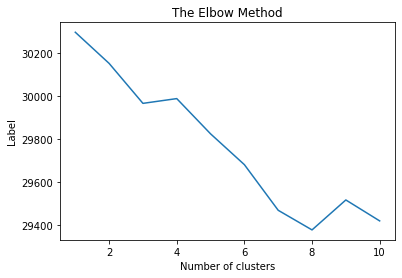

In [58]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
    kmeans.fit(X1)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Label')
plt.show()

# Where do we see the elbow being formed in the above graph?

Yes, at 3 number of clusters. So now let's perform the Kmeans clustering:

In [59]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_model=kmeans.fit_predict(X1)
labels = kmeans.labels_
correct_labels= sum(labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, labels.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(labels.size)))

Result: 4230 out of 4242 samples were correctly labeled.
Accuracy score: 1.00


# Conclusion:

In Hierarchical Clustering, we got Silhouette score of -0.046 which tells us that the clusters are overlapping*

In Kmeans Clustering, we got 4230 out of 4242 samples as correctly labelled which implies an accuracy score of 99%

# Thank You

# -- Gauraw Tripathy
